In this note we learn about function transform, log transform, reciprocal transform, square root transform

### Mathematical Transform
#### Function transform 
- Log transform
- Reciprocal Transform
- Square Root Transform 
- Square Transform
- Custom Transform

#### Power Transform
- Box-Cox Transform
- yeo-Johnsonn Transform
#### Quantile Transform

##### Finally
End goal of transform is to make the any dransform to normal distribution


### How to identify distribution
- use sns.distplot
- use pd.skew (0 = normal)
- QQ plot (most reliable)


In [12]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [13]:
df = pd.read_csv('Titanic-Dataset.csv' , usecols=['Age', 'Fare', 'Survived'])

In [14]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [16]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)


In [17]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
x = df.iloc[:,1:3]
y= df.iloc[:,0]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

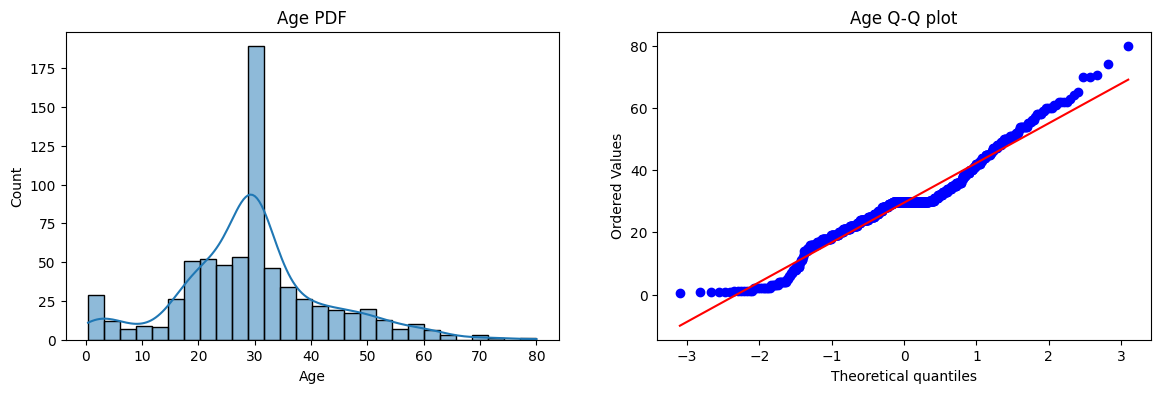

In [24]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Q-Q plot')
plt.show()

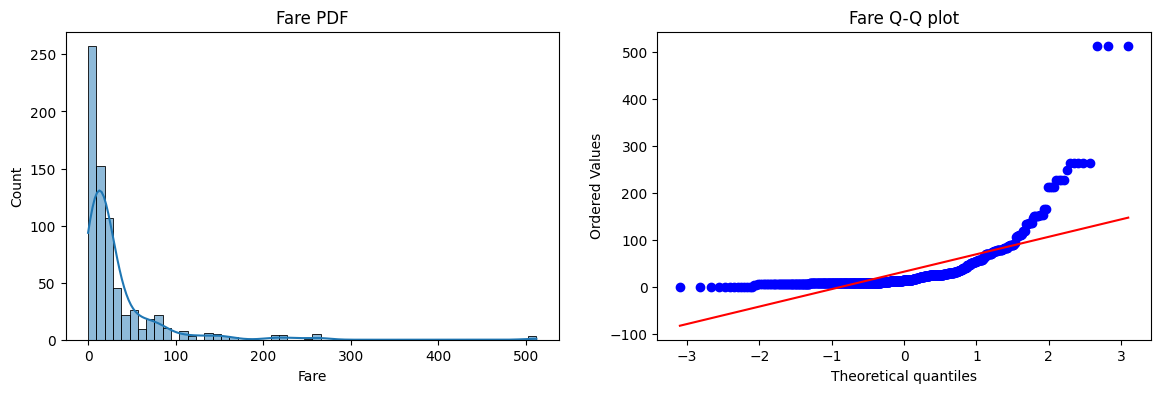

In [25]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Q-Q plot')
plt.show()

In [26]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [28]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, y_pred2))

Accuracy of Logistic Regression:  0.6480446927374302
Accuracy of Decision Tree Classifier:  0.6759776536312849


In [29]:
trf = FunctionTransformer(func=np.log1p)

In [30]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [31]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, y_pred2))

Accuracy of Logistic Regression:  0.6815642458100558
Accuracy of Decision Tree Classifier:  0.6703910614525139


In [32]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf, x_transformed, y, scoring='accuracy', cv=10)))
print("DT",np.mean(cross_val_score(clf2, x_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6599625468164794


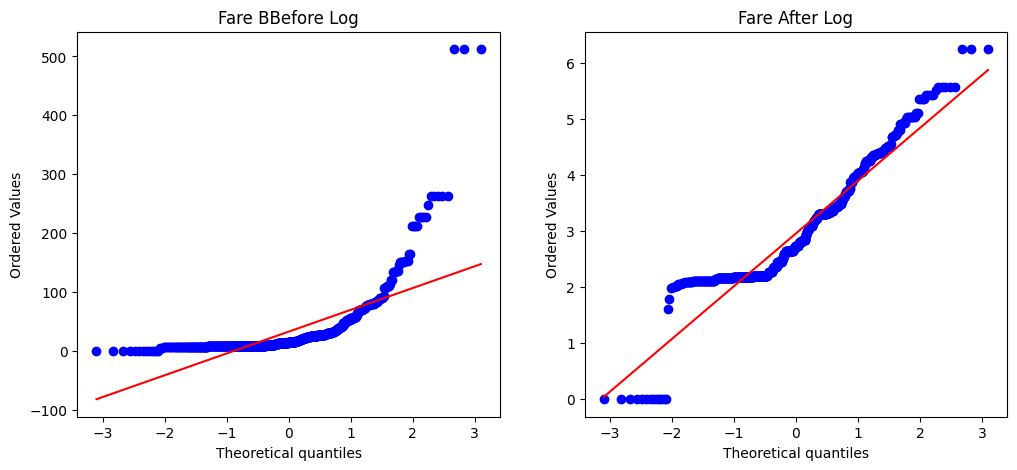

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot = plt)
plt.title('Fare BBefore Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot = plt)
plt.title('Fare After Log')

plt.show()

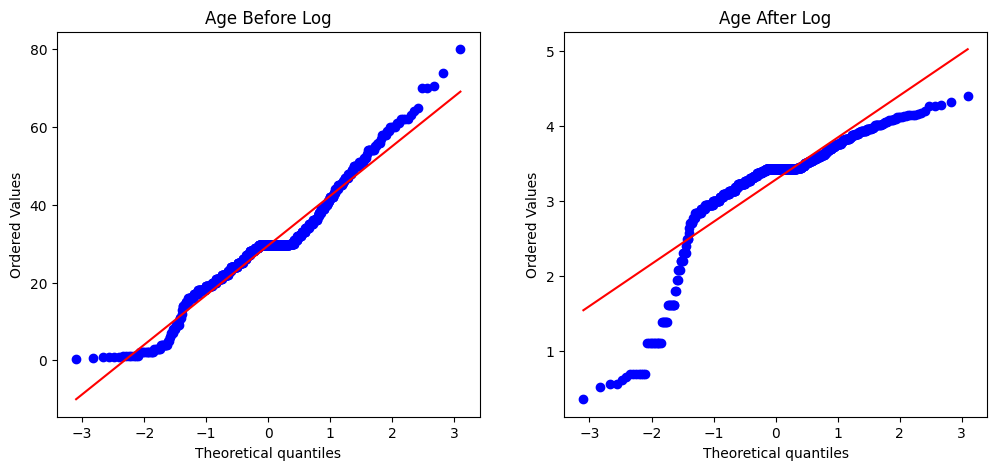

In [36]:
plt.figure(figsize=(12,5))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot = plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist="norm", plot = plt)
plt.title('Age After Log')

plt.show()

#### Only on Fare Log Transform

In [37]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')
x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [38]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2, y_train)
clf2.fit(x_train_transformed2, y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2 =   clf2.predict(x_test_transformed2)

print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, y_pred2))

Accuracy of Logistic Regression:  0.6703910614525139
Accuracy of Decision Tree Classifier:  0.659217877094972


In [39]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf, x_transformed2, y, scoring='accuracy', cv=10)))
print("DT",np.mean(cross_val_score(clf2, x_transformed2, y, scoring='accuracy', cv=10)))

LR 0.6712609238451936
DT 0.6565917602996254


#### Other Traansform

In [41]:
def apply_transform(transform):
    x= df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')

    x_trans = trf.fit_transform(x)

    clf = LogisticRegression()

    print("Accuracy", np.mean(cross_val_score(clf, x_trans, y , scoring='accuracy', cv = 10)))

    plt.figure(figsize=(12,5))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist="norm", plot = plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_trans[:, 0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Can be applied any  function 

Accuracy 0.6195131086142323


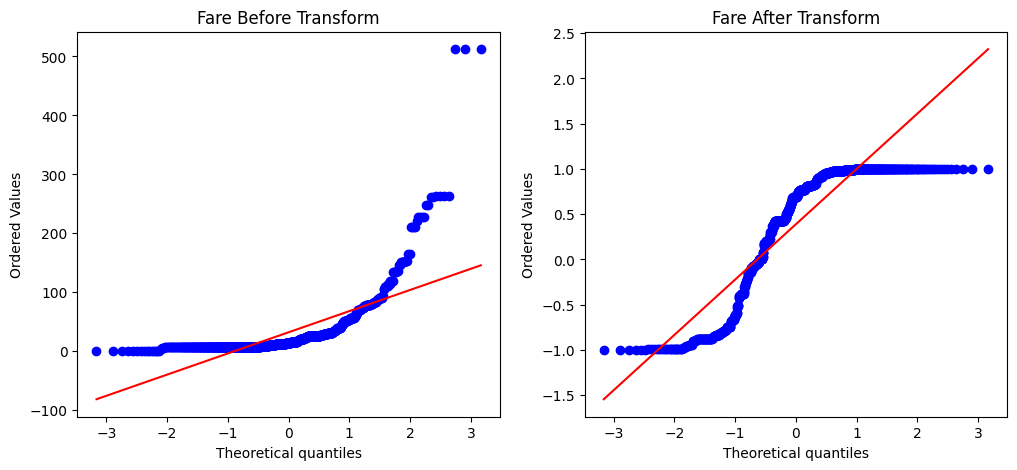

In [57]:
apply_transform(np.sin)  # Sigmoid